## Imbalanced Class Classification
### Agenda
- Introduction to Imbalanced Data
- Oversampling Techniques - SMOTE
- Undersampling Technique
- Ensemble methods for Imbalanaced Data

In machine learning classification tasks, handling imbalanced data is crucial.  The problem with this imbalance is that models tend to favor the majority class, leading to poor performance in identifying minority classes. In such cases, the model prioritizes overall accuracy instead of accurately recognizing minority class instances.

## Introduction to Imbalanced Data

Imbalanced data refers to a situation in a dataset where the classes are not represented equally. This typically happens in classification problems, where one class (the majority class) significantly outnumbers the other class or classes (the minority class or classes).

## Example

**Balanced Dataset:** A balanced dataset has an equal or nearly equal representation of all classes.
Distribution: Healthy (50.4%) and Diseased (49.6%)


**Imbalanced Dataset:** An imbalanced dataset has a significant difference in the representation of classes, with one class being much more prevalent than the others.
Distribution: Healthy (99%) and Diseased (1%)


![link text](https://labcontent.simplicdn.net/data-content/content-assets/Data_and_AI/ML/Lesson04_Regression/updates/Imbalanced_data.jpg)

## Applications of Handling Imbalanced Class 

**Medical Diagnosis:**
- Detecting rare diseases where early and accurate detection is vital.
Imbalanced data can lead to models that fail to identify patients with the disease.

**Fraud Detection:**
- Identifying fraudulent transactions among a large number of legitimate transactions.
The cost of missing fraud can be high, making accurate detection crucial.

**Spam Detection:**
- Filtering spam emails from a large volume of legitimate emails.
A balanced approach ensures spam emails are correctly identified and filtered.

In [2]:
#pip install imblearn

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Load the Dataset
##### About the Dataset


The datasets contains transactions made by credit cards in September 2013 by European cardholders.

 It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, original features and more background information about the data is not available.
 
 Features `V1, V2, ... V28` are the principal components obtained with PCA, the only features which have not been transformed with PCA are `Time` and `Amount`.
 
 Feature `Time` contains the seconds elapsed between each transaction and the first transaction in the dataset.
 
 The feature `Amount` is the transaction Amount, this feature can be used for example-dependant cost-senstive learning.
 
 Feature `Class` is the response/target variable and it takes value 1 in case of fraud and 0 otherwise.

In [4]:
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,89630.0,0.030601,0.859108,0.290804,-0.591915,0.441892,-1.033405,1.016281,-0.190080,-0.066897,...,-0.251454,-0.537176,0.081516,-0.016869,-0.498699,0.142886,0.250215,0.097351,5.99,0
1,33404.0,1.042874,0.348936,-0.207597,2.215841,0.991928,1.349503,0.100767,0.451493,-0.739607,...,0.064860,0.193583,-0.007651,-1.379281,0.389286,0.225199,0.015614,-0.010651,15.16,0
2,57910.0,-1.549217,0.444995,1.953795,0.767481,1.249854,-0.439201,0.843048,0.145210,-1.561334,...,0.226098,0.136749,-0.178771,-0.013354,0.782533,-0.175391,-0.075909,0.058072,73.02,0
3,133413.0,-0.322340,0.969558,0.462259,-0.100560,-0.187871,-1.069206,0.454631,0.211302,-0.162835,...,0.164689,0.497732,-0.038204,0.420742,-0.191605,-0.333414,-0.032846,-0.010004,9.94,0
4,171524.0,1.990957,-1.984952,-1.014321,-1.265569,-1.371786,0.034195,-1.117904,0.061933,-0.828024,...,-0.416109,-0.844353,0.244993,0.716250,-0.264875,-0.387468,-0.015237,-0.036681,137.94,0


In [6]:
## View the class distribution
df.Class.value_counts()

Class
0    1974
1      26
Name: count, dtype: int64

In [7]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,96008.534500,-0.092652,0.023323,-0.069600,0.080397,-0.048574,-0.036741,-0.079963,0.011181,-0.053920,...,0.029790,-0.003444,0.007543,0.017984,-0.024654,0.005729,0.004633,0.004542,94.149330,0.013000
std,47467.551118,2.126852,1.749730,1.883331,1.561390,1.638294,1.407870,1.708478,1.509564,1.102616,...,0.935937,0.772702,0.692343,0.583407,0.524688,0.481970,0.404822,0.257332,264.500133,0.113302
min,153.000000,-26.457745,-16.443525,-30.177317,-4.088882,-25.791132,-10.136371,-31.197329,-37.353443,-9.462573,...,-8.755698,-8.887017,-15.981649,-2.348549,-3.536716,-1.500278,-7.263482,-3.398699,0.000000,0.000000
25%,55731.250000,-0.997641,-0.588604,-0.909770,-0.833604,-0.724435,-0.774805,-0.570687,-0.205048,-0.710381,...,-0.211483,-0.544496,-0.151844,-0.342298,-0.344980,-0.320109,-0.073793,-0.055370,6.550000,0.000000
50%,88330.500000,-0.076235,0.088314,0.170230,-0.019323,-0.073699,-0.292820,0.034161,0.027115,-0.063094,...,-0.015695,0.028866,-0.003261,0.040663,-0.024389,-0.056586,0.000203,0.012315,22.400000,0.000000
75%,139201.750000,1.307517,0.810513,1.051445,0.814907,0.579966,0.363228,0.568496,0.340965,0.582080,...,0.192613,0.550136,0.152062,0.442825,0.322955,0.264462,0.098318,0.085835,75.077500,0.000000
max,172751.000000,2.354761,16.497472,4.017561,11.190895,13.367253,16.246197,25.235195,14.955107,7.173635,...,27.202839,3.460893,9.143317,1.529283,1.771865,2.215986,3.307712,2.508443,5657.540000,1.000000


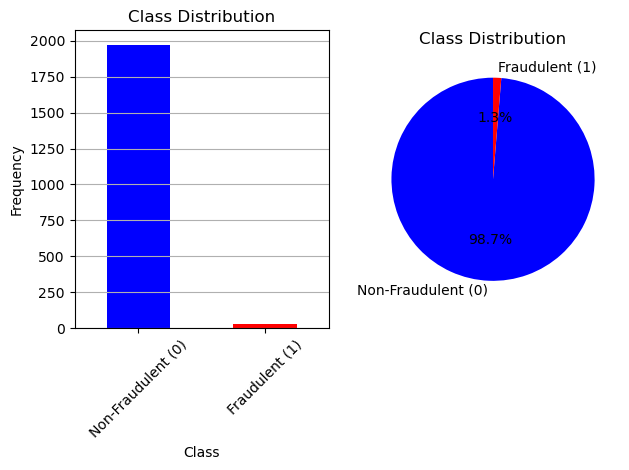

In [8]:
plt.subplot(1, 2, 1)
df.Class.value_counts().plot(kind='bar', color=['blue', 'red'])
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.xticks(ticks=[0, 1], labels=['Non-Fraudulent (0)', 'Fraudulent (1)'], rotation=45)
plt.grid(axis='y')
# Plot the distribution of the 'Class' column as a pie chart
plt.subplot(1, 2, 2)
df.Class.value_counts().plot(kind='pie', labels=['Non-Fraudulent (0)', 'Fraudulent (1)'], colors=['blue', 'red'], autopct='%1.1f%%', startangle=90)
plt.title('Class Distribution')
plt.ylabel('')
# Show the plots
plt.tight_layout()
plt.show()

**Observation**
- The dataset is highly imbalanced, with nearly 2000 non-fraudulent transactions and only around 25 fraudulent ones.
- This significant imbalance needs to be addressed to avoid biased models and ensure fair and accurate predictions.

**Using this dataset for classification has the following disadvantages:**
- **Bias Towards Non-Fraudulent Transactions:** The model may predict non-fraudulent transactions more often due to their dominance, leading to poor detection of fraudulent transactions.
- **Misleading Metrics:** High accuracy can be misleading since it may not reflect the model's performance on the minority class (fraudulent transactions). Techniques like resampling or cost-sensitive learning are needed to address this imbalance.

## Techniques to Handle Imbalanced Data

There are numerous techniques available for addressing imbalanced data. In this discussion, we will focus on understanding three key methods:


**Oversampling Techniques (e.g., SMOTE):**
- Condition for Use: Ideal when the minority class is severely underrepresented.
  
**Undersampling Techniques (Random Undersampling):**
- Condition for Use: Useful when the dataset is large enough, and removing instances won't result in significant information loss.
  
**Ensemble Methods for Imbalanced Data (Balanced Random Forest):**
- Condition for Use: Effective when leveraging an ensemble approach to maintain robustness and generalizability while addressing class imbalance.




## OverSampling Techniques
Oversampling is a technique used to balance the class distribution by increasing the number of minority class samples. This can be done by duplicating existing samples or creating synthetic ones.

![link text](https://labcontent.simplicdn.net/data-content/content-assets/Data_and_AI/ML/Lesson04_Regression/updates/oversampling.png)

__SMOTE (Synthetic Minority Over-sampling Technique)__ is a more advanced method that generates new synthetic samples for the minority class. It works by:
- Selecting a random minority class sample.
- Finding its k-nearest neighbors (usually k=5).
- Choosing one of these neighbors and creating a synthetic sample along the line segment joining the original sample and the neighbor.

*Advantages of SMOTE:**
- **Prevents overfitting:** Unlike simple duplication, SMOTE generates new samples, which helps in creating a more generalizable model.
- **Balances the dataset:** By creating new samples, SMOTE helps balance the class distribution, improving the model's ability to learn from minority class examples.

In [10]:
# Lets Apply SMOtE on creditcard Data set

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE

In [13]:
df = pd.read_csv('creditcard.csv')
df.shape

(2000, 31)

In [12]:
# Seperate feature and target
X =  df.iloc[:, :-1]
y = df.iloc[:, -1]

In [16]:
# Train test split
X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size = 0.4, random_state = 42)

In [18]:
# Standardize the data
sc = StandardScaler()
X_train_sc =  sc.fit_transform(X_train)
X_test_sc =  sc.transform(X_test)

In [19]:
X_train_sc.shape

(1200, 30)

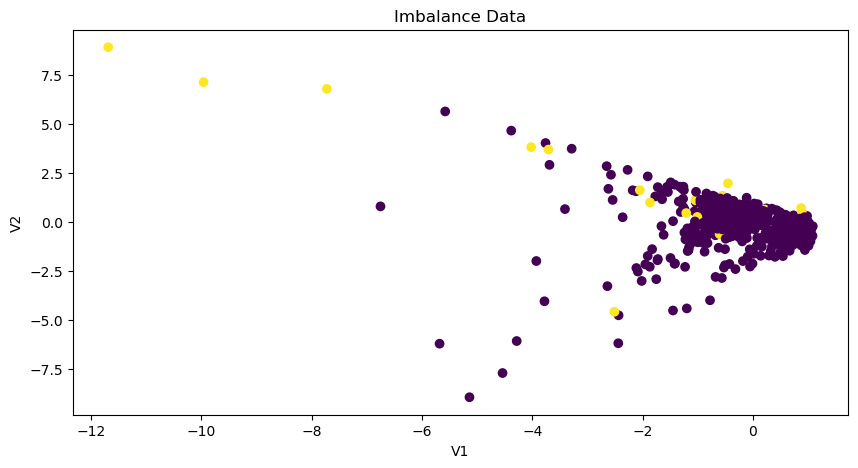

In [20]:
plt.figure(figsize = (10,5))
plt.scatter(X_train_sc[:, 1], X_train_sc[:, 2],c = y_train, cmap = 'viridis', marker = 'o')
plt.title('Imbalance Data')
plt.xlabel('V1')
plt.ylabel('V2')
plt.show()

#### __Observation__
- The color of each data point indicates the class it belongs to. The color scale on the right shows a gradient from purple (0.0) to yellow (1.0), where each color represents a class label.
- There are predominantly purple points, indicating a majority of data points belong to the class close to 0.0. Yellow points, indicating data points with a class close to 1.0, are much fewer in comparison.
Given the class imbalance, using models that can handle imbalance well or adjusting the decision threshold might be beneficial.

In [23]:
## apply SMOTE

smote =  SMOTE(random_state = 42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_sc, y_train)
X_train_smote.shape

(2364, 30)

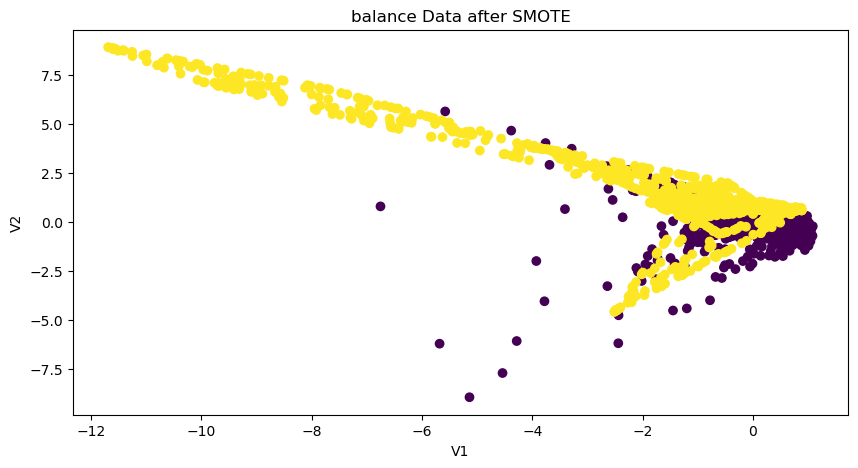

In [24]:
plt.figure(figsize = (10,5))
plt.scatter(X_train_smote[:, 1], X_train_smote[:, 2],c = y_train_smote, cmap = 'viridis', marker = 'o')
plt.title('balance Data after SMOTE')
plt.xlabel('V1')
plt.ylabel('V2')
plt.show()

In [25]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score

Train Accuracy: 0.9945008460236887
Test Accuracy: 0.985
Confusion Matrix:
[[780  12]
 [  0   8]]


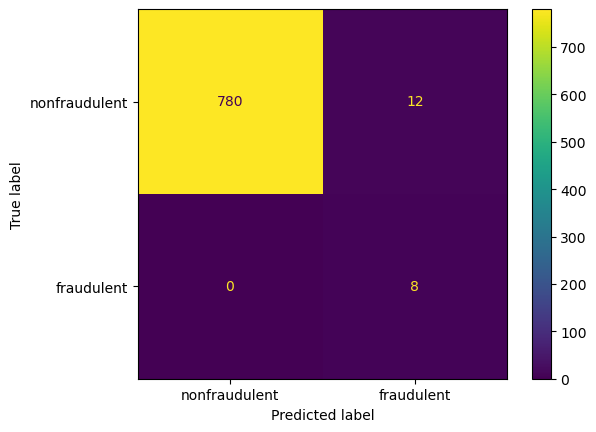

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       792
           1       0.40      1.00      0.57         8

    accuracy                           0.98       800
   macro avg       0.70      0.99      0.78       800
weighted avg       0.99      0.98      0.99       800



In [28]:
# Train the Decision Tree Classifier with pruning
dt_classifier = DecisionTreeClassifier(max_depth=3, random_state=42)  # Limiting depth to 3
dt_classifier.fit(X_train_smote, y_train_smote)
# Predict on training set
y_train_pred = dt_classifier.predict(X_train_smote)
train_accuracy = accuracy_score(y_train_smote, y_train_pred)
# Predict on testing set
y_test_pred = dt_classifier.predict(X_test_sc)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f'Train Accuracy: {train_accuracy}')
print(f'Test Accuracy: {test_accuracy}')

#Print confusion matrix

from sklearn.metrics import ConfusionMatrixDisplay
conf_matrix = confusion_matrix(y_test, y_test_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Heatmap visualization for confusion matrix
cm_display = ConfusionMatrixDisplay(confusion_matrix = conf_matrix, display_labels = ["nonfraudulent", "fraudulent"])
# display matrix
cm_display.plot()
plt.show()

## Classification_report

print(classification_report(y_test, y_test_pred))

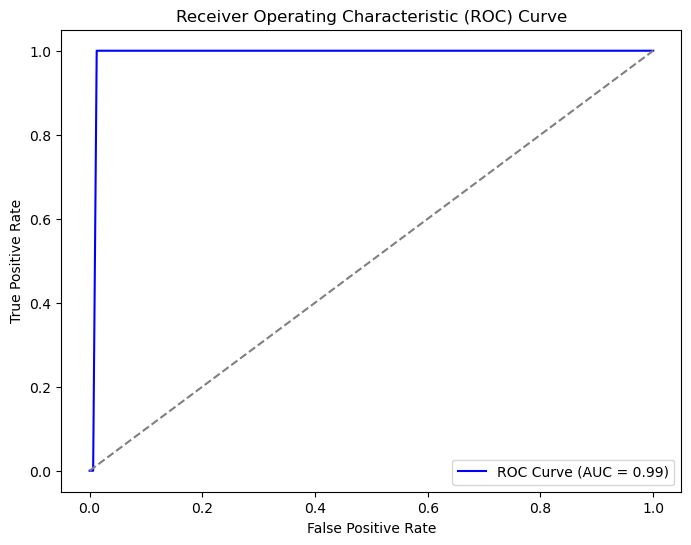

In [30]:
from sklearn.metrics import roc_auc_score, roc_curve


# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, dt_classifier.predict_proba(X_test_sc)[:, 1])
roc_auc = roc_auc_score(y_test, dt_classifier.predict_proba(X_test_sc)[:, 1])
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

## UnderSampling

Undersampling is the opposite of oversampling. It involves reducing the number of samples in the majority class to balance the dataset. This can be done by randomly removing samples or using more sophisticated techniques.

![link text](https://labcontent.simplicdn.net/data-content/content-assets/Data_and_AI/ML/Lesson04_Regression/updates/undersampling.png)

**Random Undersampling**
It is the simplest form of undersampling, where majority class samples are randomly removed to achieve balance.

**How Random Undersampling Works**
1. **Identify Majority and Minority Classes:** First, identify which class is overrepresented (majority class) and which is underrepresented (minority class) in the dataset.
2. **Randomly Remove Samples:** Randomly select and remove samples from the majority class until the number of samples in each class is balanced. For example, if you have 1,000 samples in the majority class and 100 in the minority class, you might randomly remove 900 samples from the majority class.
3. **Resulting Dataset:** The resulting dataset will have a more balanced distribution of classes, with a reduced number of samples from the majority class.



**Advantages of Random Undersampling:**
- **Simple and easy to implement:** This technique is straightforward and can be applied quickly.
- **Reduces training time:** By reducing the number of samples, it can speed up the training process.
**Disadvantages of Random Undersampling:**
- **Loss of information:** Removing samples from the majority class can lead to loss of important information.
- **Overfitting:** The model might overfit to the remaining data, especially if the dataset is small.

In [31]:
from imblearn.under_sampling import RandomUnderSampler

In [32]:
rus =  RandomUnderSampler(random_state = 42)
X_train_rus, y_train_rus = rus.fit_resample(X_train_sc, y_train)
X_train_rus.shape

(36, 30)

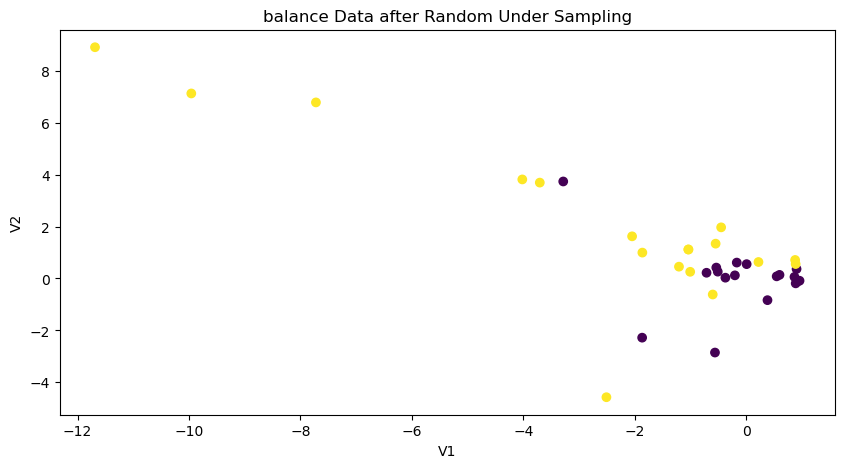

In [33]:
plt.figure(figsize = (10,5))
plt.scatter(X_train_rus[:, 1], X_train_rus[:, 2],c = y_train_rus, cmap = 'viridis', marker = 'o')
plt.title('balance Data after Random Under Sampling')
plt.xlabel('V1')
plt.ylabel('V2')
plt.show()

Train Accuracy: 1.0
Test Accuracy: 0.8075
Confusion Matrix:
[[638 154]
 [  0   8]]


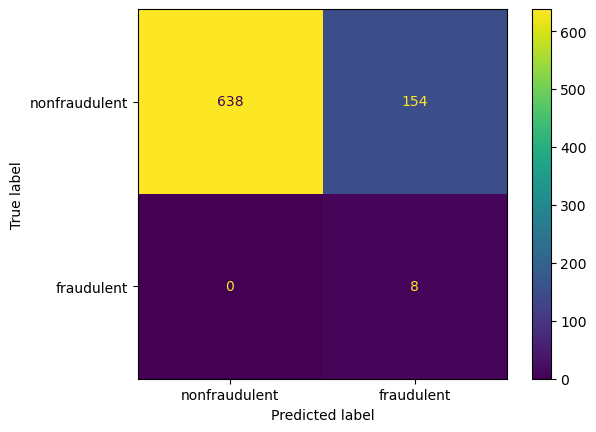

              precision    recall  f1-score   support

           0       1.00      0.81      0.89       792
           1       0.05      1.00      0.09         8

    accuracy                           0.81       800
   macro avg       0.52      0.90      0.49       800
weighted avg       0.99      0.81      0.88       800



In [34]:
# Train the Decision Tree Classifier with pruning
dt_classifier = DecisionTreeClassifier(max_depth=3, random_state=42)  # Limiting depth to 3
dt_classifier.fit(X_train_rus, y_train_rus)
# Predict on training set
y_train_pred = dt_classifier.predict(X_train_rus)
train_accuracy = accuracy_score(y_train_rus, y_train_pred)
# Predict on testing set
y_test_pred = dt_classifier.predict(X_test_sc)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f'Train Accuracy: {train_accuracy}')
print(f'Test Accuracy: {test_accuracy}')

#Print confusion matrix

from sklearn.metrics import ConfusionMatrixDisplay
conf_matrix = confusion_matrix(y_test, y_test_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Heatmap visualization for confusion matrix
cm_display = ConfusionMatrixDisplay(confusion_matrix = conf_matrix, display_labels = ["nonfraudulent", "fraudulent"])
# display matrix
cm_display.plot()
plt.show()

## Classification_report

print(classification_report(y_test, y_test_pred))